<a href="https://colab.research.google.com/github/Dan5049/MPC-MLF/blob/main/Final%20project/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project
## MPA-MLF
**Daniel Havránek**


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model, model_to_dot

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl

# from keras.datasets import cifar10
# from sklearn.neighbors import KNeighborsClassifier
# from keras.backend import clear_session

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

csv_test = np.load("/content/drive/My Drive/MLF/csv_test.npy")
csv_train = np.load("/content/drive/My Drive/MLF/csv_train.npy")
y_train_loaded = pd.read_csv("/content/drive/My Drive/MLF/y_train.csv")

y_train_loaded = y_train_loaded.drop("id", axis=1)

Mounted at /content/drive


In [3]:
x_train, x_test, y_train, y_test = train_test_split(csv_train, y_train_loaded, test_size=0.2)

n_classes = 3

x_train_scaled = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_scaled = (x_test - x_test.min()) / (x_test.max() - x_test.min())
x_data = (csv_test - csv_test.min()) / (csv_test.max() - csv_test.min())

y_train_0 = y_train - 1
y_train_encoded = to_categorical(y_train_0.to_numpy().reshape(-1,1), num_classes=n_classes)
y_test_0 = y_test - 1
y_test_encoded = to_categorical(y_test_0.to_numpy().reshape(-1,1), num_classes=n_classes)

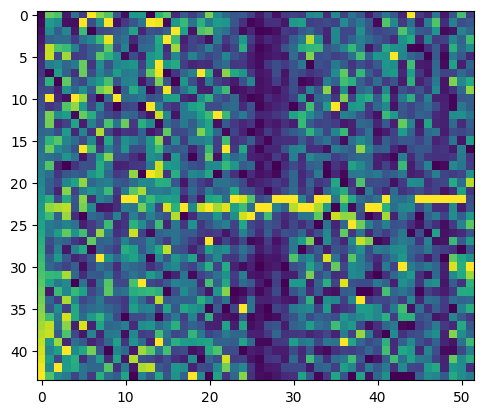

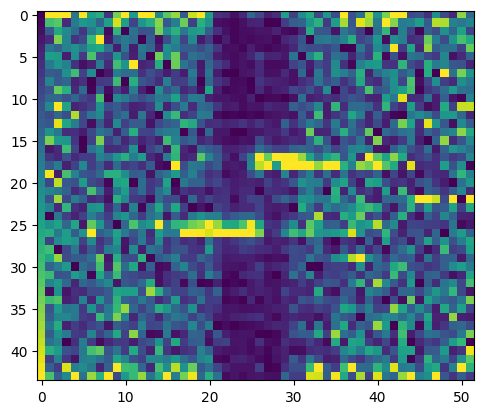

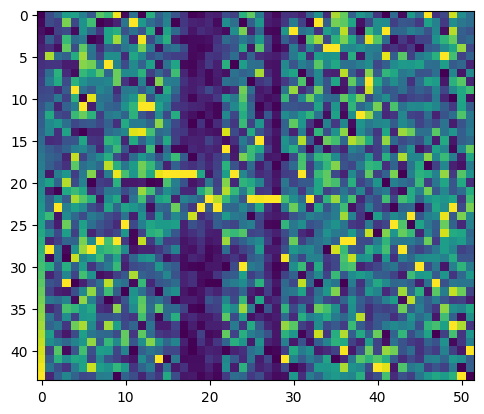

In [4]:
img_9 = pd.read_csv("/content/drive/My Drive/MLF/img_9.csv")
img_46 = pd.read_csv("/content/drive/My Drive/MLF/img_46.csv")
img_611 = pd.read_csv("/content/drive/My Drive/MLF/img_611.csv")

img_9 = (img_9 - img_9.min()) / (img_9.max() - img_9.min())
img_46 = (img_46 - img_46.min()) / (img_46.max() - img_46.min())
img_611 = (img_611 - img_611.min()) / (img_611.max() - img_611.min())

plt.figure()
plt.imshow(img_9)
plt.savefig('/content/drive/My Drive/MLF/img_9.png')
plt.figure()
plt.imshow(img_46)
plt.savefig('/content/drive/My Drive/MLF/img_46.png')
plt.figure()
plt.imshow(img_611)
plt.savefig('/content/drive/My Drive/MLF/img_611.png')

In [181]:
model = Sequential()
model.add(Flatten(input_shape=(44, 52))) 
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(512, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_45 (Flatten)        (None, 2288)              0         
                                                                 
 dense_167 (Dense)           (None, 512)               1171968   
                                                                 
 dense_168 (Dense)           (None, 512)               262656    
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_169 (Dense)           (None, 512)               262656    
                                                                 
 dense_170 (Dense)           (None, 3)                 1539      
                                                                 
Total params: 1,698,819
Trainable params: 1,698,819
N

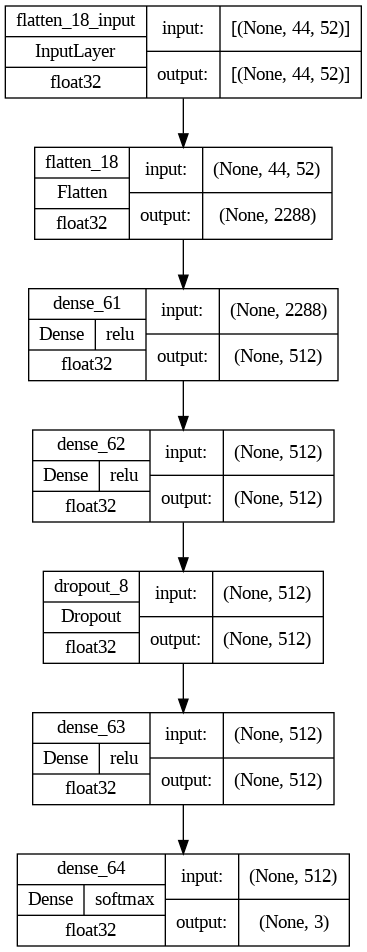

In [70]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False,
)

In [182]:
optimizer = Adam(learning_rate = 0.005)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_split = 0.2, verbose=1)

Epoch 1/50
166/166 [==============================] - 1s 5ms/step - loss: 0.6881 - accuracy: 0.6880 - val_loss: 0.5536 - val_accuracy: 0.7509
Epoch 2/50
166/166 [==============================] - 1s 4ms/step - loss: 0.3706 - accuracy: 0.8564 - val_loss: 0.3064 - val_accuracy: 0.8966
Epoch 3/50
166/166 [==============================] - 1s 4ms/step - loss: 0.2442 - accuracy: 0.9081 - val_loss: 0.2012 - val_accuracy: 0.9336
Epoch 4/50
166/166 [==============================] - 1s 4ms/step - loss: 0.1706 - accuracy: 0.9383 - val_loss: 0.1643 - val_accuracy: 0.9366
Epoch 5/50
166/166 [==============================] - 1s 4ms/step - loss: 0.1169 - accuracy: 0.9602 - val_loss: 0.3480 - val_accuracy: 0.8860
Epoch 6/50
166/166 [==============================] - 1s 5ms/step - loss: 0.1211 - accuracy: 0.9572 - val_loss: 0.3876 - val_accuracy: 0.8838
Epoch 7/50
166/166 [==============================] - 1s 5ms/step - loss: 0.0700 - accuracy: 0.9745 - val_loss: 0.2279 - val_accuracy: 0.9245
Epoch 

In [183]:
score = model.evaluate(x_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.17270447313785553
Test accuracy: 97.16183543205261 %


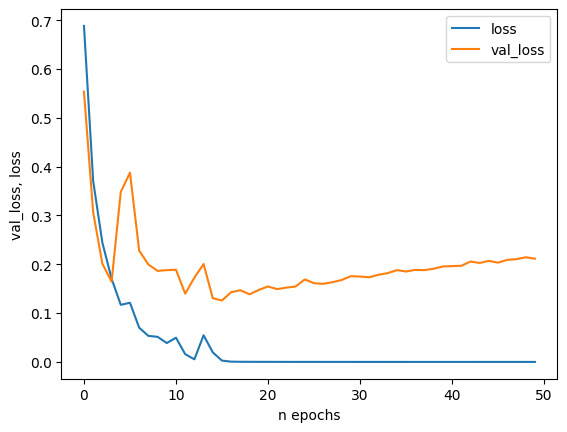

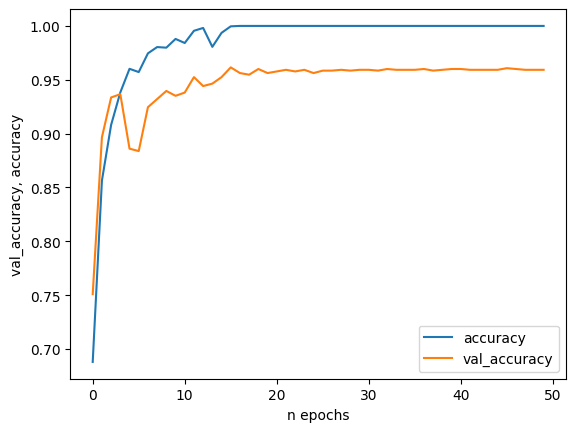

In [184]:
plt.figure()
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(loc="upper right")
plt.xlabel('n epochs')
plt.ylabel('val_loss, loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend(loc="lower right")
plt.xlabel('n epochs')
plt.ylabel('val_accuracy, accuracy')
plt.show()

111/111 [==============================] - 0s 2ms/step


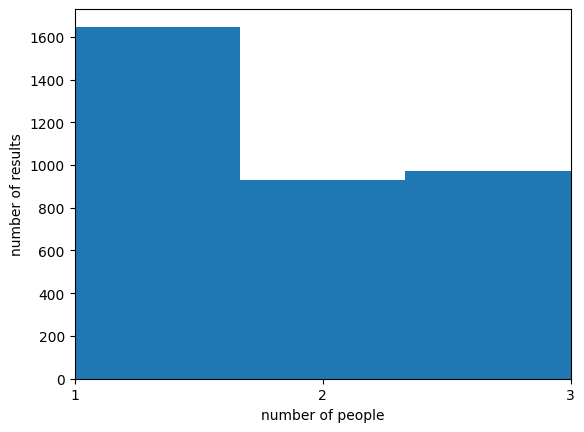

In [185]:
predicted = model.predict(x_data)

ind = np.argmax(predicted, axis=1)
res = ind + 1
result = pd.DataFrame({'id': np.arange(0, len(res)), 'target': res})
result = result.drop("id", axis=1)
result.index.name = 'id'

plt.figure()
plt.hist(result, bins=3)
plt.xlim(left=1, right=3)
plt.xticks([1, 2, 3])
plt.xlabel("number of people")
plt.ylabel("number of results")
plt.show()

In [186]:
from google.colab import files
result.to_csv('result.csv') 
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>